# Archery Tournament

> Robin of Foxley has entered the FiveThirtyEight archery tournament. Her aim is excellent (relatively speaking), as she is guaranteed to hit the circular target, which has no subdivisions — it’s just one big circle. However, her arrows are equally likely to hit each location within the target.

> Her true love, Marian, has issued a challenge. Robin must fire as many arrows as she can, such that each arrow is closer to the center of the target than the previous arrow. For example, if Robin fires three arrows, each closer to the center than the previous, but the fourth arrow is farther than the third, then she is done with the challenge and her score is four.

> On average, what score can Robin expect to achieve in this archery challenge?

It's tempting to think that this reduces to selecting points on a line at random until one point ends up on the left of an existing point.

But of course that can't be correct. There are more points closer to a circumference than the center. In fact, 2 times as many, because the circumference is $2\pi r$. [This](https://stackoverflow.com/a/5838055) seems to have an accurate method for generation, but [this](https://stackoverflow.com/a/50746409) gives a second method, explains it thoroughly, and even (indirectly) explains why the first method works. You really should read the whole thing.

Now we can do a simulation.

In [5]:
import random
from math import sqrt

class Simulator(object):
    def __init__(self):
        self.reset()

    def shoot(self):
        if self.radii:
            self.shots += 1
            r = sqrt(random.random())
            self.radii = r if r < self.radii else None

    def reset(self):
        self.radii = 1
        self.shots = 0

class Simulation(object):
    def __init__(self, sim, numSims):
        self.sim = sim
        self.numSims = numSims

    def go(self):
        results = []
        for i in range(self.numSims):
            self.sim.reset()
            while self.sim.radii:
                self.sim.shoot()
            results.append(self.sim.shots)
        return(results, sum(results) * 1. / self.numSims)

2.717907


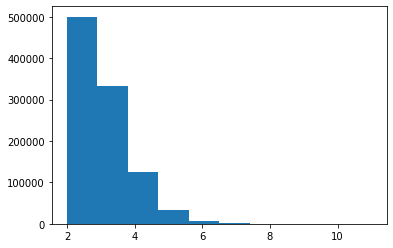

In [6]:
from matplotlib import pyplot as plt

s = Simulation(Simulator(), 1000000)
res = s.go()
plt.hist(res[0])
print(res[1])

After 1 million sims, the average score is something around 2.718. We see that 2 points happen almost exactly half the time. Then 3 points about $1/3$rd of the time. But then 4 points about $1/8$th of the time, and 5 points about $1/25$th or $1/30$th of the time.

I've been stewing over and staring at this for a few hours, trying to find a pattern, and I think I finally see it. The probability of scoring $n$ points is

$$
f(x) = \frac{1}{(n-2)!+(n-1)!}
$$

It feels binomial, or Fibonacci-adjacent. In terms of shape, it looks like something Pareto. Don't you love my precise language?

A few more hours and I have it: the answer is $e$. It speaks poorly of me that 2.718 didn't trigger that realization immediately.

The graph and function above are the PDF of the distribution. We know that the expected value of a discrete PDF is $E[X] = \sum_{-\infty} ^\infty xf(x)$. Notice that the terms of $\sum_{n=2}^\infty \frac{n}{(n-2)!+(n-1)!}$, and the terms of the sum $\sum_{n=0}^\infty \frac{1}{n!}$, match up perfectly: 1, 1, 0.5, $0.\bar3$. We know the latter is one definition of $e$, among many others. Can we get from one to the other with factorial identities? To align the lower bounds, let $k = n - 2$

$$
\begin{aligned}
f(x) &= \frac{n}{(n-2)!+(n-1)!} \\
&= \frac{k+2}{k!+(k+1)!} \\
&= \frac{k+2}{k!+k!(k+1)} \\
&= \frac{k+2}{k!(1+k+1)} \\
&= \frac{k+2}{k!(k+2)} \\
&= \frac{1}{k!} \\
\end{aligned}
$$